<a href="https://colab.research.google.com/github/kingsuching/Frost2021Package/blob/main/DATA_301_Lab_1B_Sucheen_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

In [ ]:
# TYPE YOUR CODE HERE.
from google.colab import files
import pandas as pd
responses = files.upload()
responses = pd.read_csv("response.csv")

Saving response.csv to response.csv


**TYPE YOUR WRITTEN EXPLANATION HERE.**

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

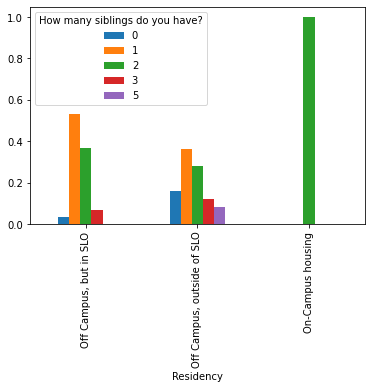

In [ ]:
# TYPE YOUR CODE HERE.
import seaborn as sns
responses.rename(columns={"Where are you living this quarter?": "Residency"}, inplace=True)
ct = pd.crosstab(responses["How many siblings do you have?"], responses["Residency"], normalize=True).divide(responses["Residency"].value_counts(normalize=True))
ct.T.plot.bar()

In [ ]:
responses.groupby("Residency")["How many siblings do you have?"].mean()

Residency
Off Campus, but in SLO        1.466667
Off Campus, outside of SLO    1.680000
On-Campus housing             2.000000
Name: How many siblings do you have?, dtype: float64

**TYPE YOUR WRITTEN EXPLANATION HERE.**

Students who lived off campus but in SLO tended to have fewer siblings, as evidenced by the faceted histogram. However, some students who lived outside of SLO have more siblings than the in-SLO students. The place that had the highest average number of siblings is on-campus.

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

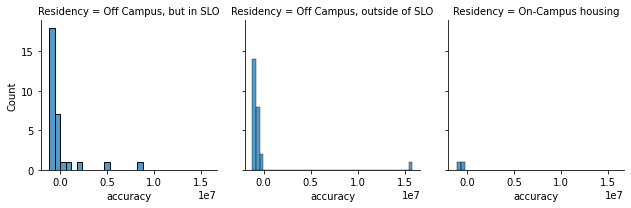

In [ ]:
# TYPE YOUR CODE HERE.
responses.rename(columns={"Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?": "golfBalls"}, inplace=True)
responses["accuracy"] = responses["golfBalls"].astype(float).map(lambda n: n-1179360)
sns.FacetGrid(data=responses, col = "Residency").map(sns.histplot, "accuracy")


**TYPE YOUR WRITTEN EXPLANATION HERE.**

## Question 4

Write and answer your own question using this data set.

,major,Residency,How many siblings do you have?,What is your favorite color?,"What is a cool TV show, movie, or book that you liked in 2020?",golfBalls,Do you consider yourself a sports fan?,Do you enjoy video games?,Do you consider yourself artistic?,accuracy
6,Statistics,"Off Campus, but in SLO",1,blue,Queen's Gambit,1083623.0,Yes,Yes,Yes,-95737.0
44,Other,"Off Campus, but in SLO",1,Green,Soul,1250000.0,No,Yes,No,70640.0


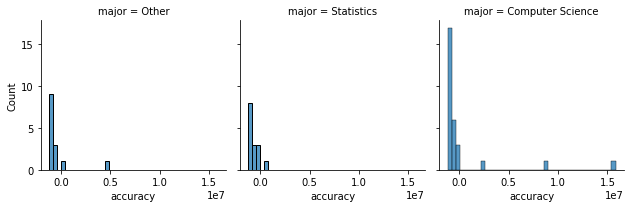

In [ ]:
# TYPE YOUR CODE HERE.
# Do people tend to guess differently for the number of golf balls that fit in a school bus given their major?
responses.rename(columns={"What is your major?": "major"}, inplace=True)
sns.FacetGrid(data = responses, col = "major").map(sns.histplot, "accuracy")
table = pd.crosstab(responses["accuracy"], responses["major"], normalize=True).divide(responses["major"].value_counts(normalize=True))
responses[abs(responses["accuracy"]) < 100000]
#table

The plot

In [ ]:
responses.groupby("major")["accuracy"].mean()

major
Computer Science    183521.869724
Other              -504763.142857
Statistics         -699138.466667
Name: accuracy, dtype: float64